# Table de hachage - Dictionnaire

[Vidéo d'aide pour le TP](https://vimeo.com/492613667)

Les dictionnaires - `dict` - de Python utilise une *structure de données* appelé **tables de hachages** ou **tables associatives**.

Il existe plusieurs sortes de tables de hachage. Nous nous concentrerons sur une variante appelée **table de hachage chaînées**.

L'**objectif principale** d'une telle structure est d'accélérer la recherche d'un élément **donné**: 

> *cet élément est-il ou non dans la structure?*

Les **principales opérations** d'une table de hachage (appelées *opérations de dictionnaire*) sont:
- l'**insertion** d'une donnée,
- sa **suppression** et
- sa **recherche**.

L'idée principale est d'utiliser:
1. Une **fonction de hachage**,
2. Un **tableau de taille fixe** (notée $n$) contenant des **listes chaînées** (vides initialement).

#### vue d'ensemble

**Affichez la séparément pour la garder en vue**: clic gauche sur l'onglet, *new view for notebook*.

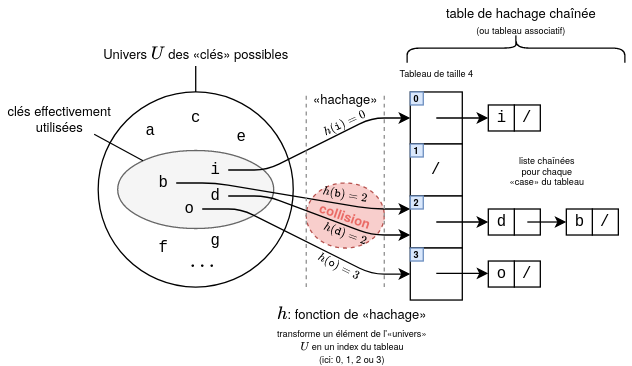

## Fonction de hachage

Étant donné un élément à insérer - on parle souvent de **clé** dans ce contexte - dans le tableau associatif, on commence par le passer «à la moulinette» afin d'en déduire un **index** dans le tableau de taille fixe, c'est-à-dire un entier compris entre $0$ et $n-1$ (où $n$ est la taille du tableau).

C'est le rôle de la **fonction de hachage** noté ici $h$:

> appliquée à un élément (clé), elle renvoie l'un des *index* du tableau de taille fixe sous-jacent.

Pour simplifier, nous considérerons que les éléments à insérer sont des *chaînes de caractères*. 

Pour vous donnez une idée concrète de **fonction de hachage** (peu efficace mais simple), celle que nous utiliserons fait ce qui suit:
1. elle calcule la **somme** des points de code unicode - `ord(<car>)` - des caractères de la chaîne,
2. puis calcule le **reste** de la division entière du nombre obtenu par $n$ (la taille du tableau fixe).

Ainsi, nous sommes sûr que sa valeur de retour peut jouer le rôle d'**index** *dans le tableau*. 

Bien sûr deux chaînes différentes peuvent produire un même index... ("ab" et "ba" par exemple): on parle alors de **collision**.

#### Exercice 1

Implémenter cette fonction de hachage.

In [ ]:
def h(cle, n):
    """calcule la valeur de hachage de l'élément appelé cle (de type str).
    n désigne la taille du tableau fixe de la table.
    """
    pass

In [ ]:
def h(cle, n):
    return sum(ord(car) for car in cle) % n 

## Insertion dans la table

On suppose donné un élément de type `str` qu'on appelera **clé** dans ce contexte.

Après lui avoir appliqué la fonction de hachage $h$, il y a deux situations possibles:

1. l'index produit par `h` correspond à une case libre,

2. il correspond à une case déjà occupée: il y a eu **collision**.

Les différentes sortes de tables de hachages se *distinguent par la stratégie de résolution de ces collisions*.

Dans notre cas, la solution est simple, on insère la clé (et éventuellement une ou des valeurs «satellites») en tête de la liste chaînée associée à cette case.

## La recherche est considérablement accélérée

Dans l'idéal, une fonction de hachage de «bonne» qualité:
1. calcul très rapidement l'index associé à une clé,
2. répartie les clés de manière uniforme dans la table...

Dans ces conditions, si le tableau a une taille fixée de disons $n=1000$ et qu'on insère $n=3000$ clés dans la table, les listes chaînées devrait avoir une longueur moyenne de $3$ ($3000/1000$) - qu'on appelle *facteur de charge* de la table.

Dès lors, la recherche d'une clé donnée est très rapide, puisqu'il suffit, après calcul de l'index correspondant, de parcourir une «petite» liste de taille 3 plutôt qu'une grande de taille 3000.

## Application: Imitation d'un dictionnaire Python 

Notre objectif est de produire une structure similaire aux dictionnaires de Python. Notamment, on doit pouvoir:

- **créer** un dictionnaire vide: `d = Dictionnaire()`
- **insérer** une clé (de type `str`) associée à une valeur (de type arbitraire): `d["note"] = 20`
- **vérifier** si une clé appartient au dictionnaire: `"truc" in d`
- **récupérer** la valeur associée à une clé donnée: `note = d["note"]`
- **supprimer** une clé (et aussi la valeur associée): `del d["note"]`
- et accessoirement:
    - connaître le nombre de paires contenues dans le dictionnaire `N = len(d)`,
    - afficher notre dictionnaire de façon similaire à ce que fait python avec les siens,
    - ...

Commençons par importer nos listes chaînées et à définir les attributs de base de la structure:

In [ ]:
from liste_simple import Liste # voir fichier liste_simple.py

def h(cle, n): # rappel de la fonction de hachage
    return sum(ord(car) for car in cle) % n 

In [ ]:
class Dictionnaire:
    def __init__(self, taille=1000, hash_fn=h):
        self._h = lambda cle: hash_fn(cle, taille) # fonction de hachage
        self._t = [Liste() for _ in range(taille)] # tableau de taille fixe
        self._len = 0                              # nb de paires clé-valeur
        
    def __len__(self):
        return self._len

In [ ]:
d = Dictionnaire()
assert len(d) == 0

### Un «utilitaire» pour les autres méthodes

#### Exercice 2

Compléter les parties manquantes après avoir soigneusement lu la docstring.

In [ ]:
def _chercher(self, cle):
    """
    Utilitaire pour éviter la répétition de code.
    Recherche la clé fournie dans le dictionnaire:
    
    En cas de succès renvoie un tuple de la forme (index, cellule_avant, cellule)
        où index désigne: l'index correspondant à la clé,
           cellule_avant: la cellule de cette liste situé immédiatement avant la cellule contenant la clé (ou None)
           cellule      : la cellule de la liste contenant la clé
    
    En cas d'échec, renvoie (index, None, None)
    
    Ainsi index, cav, c = d._chercher(cle) donne toutes les informations nécessaires pour:
    - insérer avec index ou mettre à jour avec c,
    - récupérer la valeur associée à une clé avec c
    - supprimer avec index et cav...    
    """
    index = ___ # de type int
    precedente = None
    courante = ___ # de type Cellule
    while courante is not None:
        # la valeur d'une cellule est un tuple (cle, valeur)
        c, _ = courante.valeur 
        if ___:
            return (index, precedente, courante)
        # préparer le prochain tour de boucle éventuel
        ___
        ___
    # Nous n'avons pas trouvé la clé
    return (index, None, None)

Dictionnaire._chercher = _chercher
del _chercher

In [ ]:
d = Dictionnaire()
assert d._chercher("Truc")[2] is None

### L'opérateur `in`

#### Exercice 3

À implémenter (très simple, *réutiliser* l'utilitaire *_chercher*)

In [ ]:
def contient(self, cle):
    """Implémentation de l'opérateur in; renvoie True ou False"""
    pass

Dictionnaire.__contains__ = contient
del contient

In [ ]:
d = Dictionnaire()
assert "truc" not in d

### Insertion d'un couple clé-valeur

#### Exercice 4

À compléter sachant que pour mémoriser une paire clé-valeur, on place un tuple (cle, valeur) dans une cellule de la liste chaînée adéquate.

*Note*: un tuple est *immuable*, impossible de changer l'une de ses valeurs; mais on peut le reconstruire...

In [ ]:
def inserer(self, cle, valeur):
    """Insertion ou Mise à Jour de la valeur associée à une clé.
    Si d est un Dictionnaire, d[cle] = valeur a pour effet:
    - d'insérer le couple (cle, valeur) si clé n'est pas déjà dans le dictionnaire,
    - ou de mettre à jour la valeur associée à la clé si celle-ci est déjà dedans.
    """
    # commençons par chercher...
    index, _, cellule = ___
    # ... pour savoir si c'une insertion ou une mise à jour?
    if ___: # insertion
        pass
    else: # mise à jour
        pass

Dictionnaire.__setitem__ = inserer

In [ ]:
d = Dictionnaire()
d["oh"] = True
assert len(d) == 1
d["hé?"] = False
assert len(d) == 2
assert "oh" in d
assert "hé?" in d
assert "oh hé?" not in d
# mise à jour
d["oh"] = 5
assert len(d) == 2

### Un utilitaire pour visualiser la structure 

Ici, il s'agit juste de pouvoir visualiser la structure de la table de hachage. Lire brièvement et exécuter.

In [ ]:
def voir(self):
    """Uniquement pour visualiser la structure sous-jacente."""
    for i in range(len(self._t)):
        liste = self._t[i]
        if len(liste) > 0:
            print(f"case {i}: {liste}")

Dictionnaire.voir = voir
del voir

Testons cela maintenant que nous pouvons insérer des données dans le dictionnaire:

In [ ]:
from random import choices, randint

# choices(seq, k): tire au hasard k éléments parmis ceux de la séquence seq sans remise...
# produit une liste.
# ex choices("abcd", 3) peut produire ['c','a','c'] ou ['b', 'd', 'c'] ...

alpha = " abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZàéèïîôêâ@"
# Rappel: "->".join(['a', 'b', 'c']) produit 'a->b->c'
mots = [
    "".join(choices(alpha, k=randint(1, 60))) # produit un mot au hasard
    for k in range(2000)
] # donc une liste de 2000 mots au hasard

d = Dictionnaire()
for mot in mots:
    d[mot] = randint(1,100) # associons une valeur arbitrairement

d.voir()

### Récupérer la valeur associée à une clé (si elle existe!)

#### Exercice 5

À implémenter complètement après avoir bien lu la doctring.

In [ ]:
def obtenir(self, cle):
    """Renvoie la valeur associée à la clé ou produit une IndexError(<message>) si la clé
    n'est pas dans le dictionnaire. Permet l'utilisation de la syntaxe «naturelle»:
        v = d[cle]
    """
    pass

Dictionnaire.__getitem__ = obtenir
del obtenir

In [ ]:
d = Dictionnaire()
d["oh"] = True
# test de l'accès
v = d["oh"]
assert v == True
d["hé?"] = False
# test de la mise à jour
d["oh"] = False
assert not d["oh"]
# test du déclenchement d'une erreur
try:
    v = d["oh hé?"]
    assert v == "pas possible!"
except IndexError:
    pass

### Supprimer une clé (si elle est bien dans le dictionnaire)

#### Exercice 6

À implémenter complètement après avoir.

In [ ]:
def supprimer(self, cle):
    """Supprime le couple cle-valeur du dictionnaire.
    Lève une erreur si cle n'est pas dans le dictionnaire.
    Permet l'emploi de la syntaxe «naturelle»:
        del d[cle]
    Ne renvoie rien.
    """
    pass

Dictionnaire.__delitem__ = supprimer
del supprimer

In [ ]:
d = Dictionnaire()
d["oh"] = True
del d["oh"]
assert not "oh" in d
assert len(d) == 0

### Afficher similairement à un `dict`

#### Exercice 7

À implémenter complètement après avoir lu attentivement la docstring.

In [ ]:
def afficher(self):
    """Affiche le dictionnaire similairement à ce que fait Python
    avec les siens. 
    ATTENTION: L'ordre des paires clé-valeur est arbitraire. 
    Permet l'utilisation de la syntaxe «naturelle»:
        str(d) ou print(d) ou f"dictionnaire: {d}"...
    Exemple: d = Dictionnaire(); d["a"] = 5; d["b"] = 0
    Alors print(d) affiche {"a": 5, "b": 0} ou {"b": 0, "a": 5}
    """
    pass

Dictionnaire.__str__ = afficher
del afficher

In [ ]:
d = Dictionnaire()
assert str(d) == "{}"
d["un"] = 1
d["deux"] = 2
d["trois"] = 3
d["quatre"] = 4
d["cinq"] = 5
print(d) # difficile à tester à cause de l'ordre...